In [9]:
alpha=0.0001

step
step
step
step
step
step
step
step
step
step


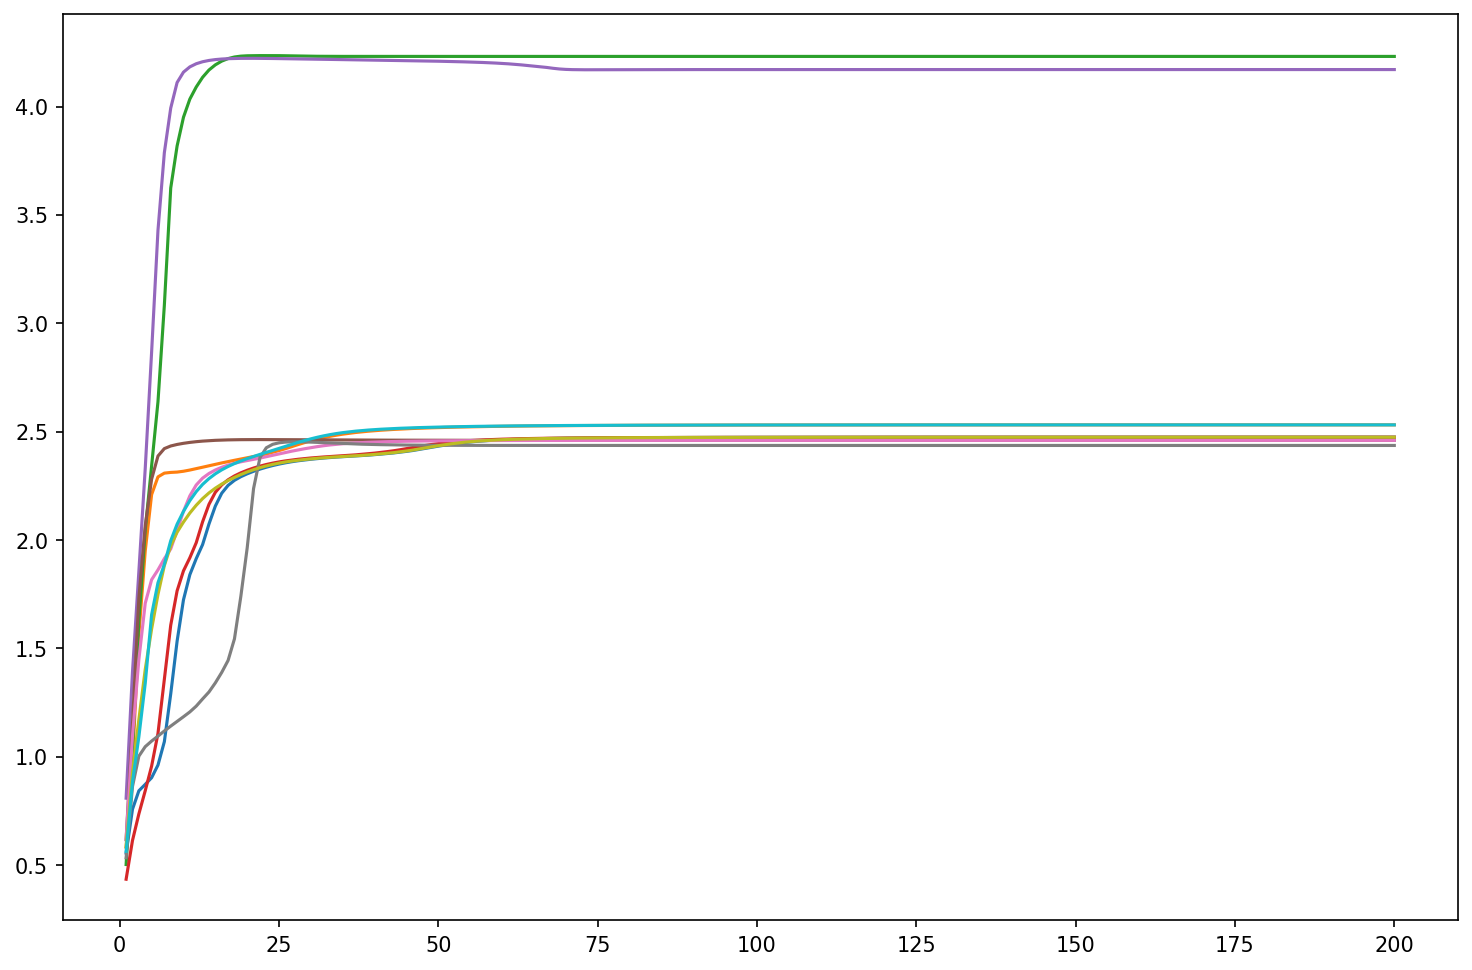

In [32]:
llh=[]
ll=(llh,)*10
covs=[]
mus=[]
pis=[]
yaxis=range(1,201)
for i in range(10):
    ri,llh,cov,mu,pi=expectation(X,3,200)
    ll[i].append(llh)
    plt.plot(yaxis,llh)

In [10]:
def pdf(X,mean,cov,covi):
    old = np.seterr(invalid='ignore')
    meanx=X-mean
    p=2*3.14**(-7/2)*(np.linalg.det(np.abs(cov))**(-1/2)) *np.exp((-0.5)*meanx.T@covi@meanx)
    return p 

In [11]:
def rik(X,cov,mu,pi,k,covi):
    ri=np.zeros((X.shape[0],k))
    for i in range(len(X)):
        denom=0
        for j in range(k):
            denom=denom+(pi[j]*pdf(X[i],mu[j],cov[j],covi[j]))
        for l in range(k):
            numer=(pi[l]*pdf(X[i],mu[l],cov[l],covi[l]))
            ri[i][l]=numer/denom
    return ri

In [12]:
def mun(r,mk,X,k):
    ak=[]
    for l in range(k):
            m=0
            for n in range(len(X)):
                m=m+(r[n][l]*(X[n]))
            ak.append(m) 
    return np.array(ak)  

In [13]:
 def nyon(r,mk,X,k,mu):
    bk=[]
    for l in range(k):
            m=0
            for n in range(len(X)):
                m=m+r[n][l]*(np.dot(np.transpose([X[n]-mu[l]]),([X[n]-mu[l]])))
            bk.append(m)    
    return np.array(bk)

In [14]:
llh=[]
def appen(X,mu,cov,covi,pi,k):
    n=0
    for i in range(len(X)):
        denom=0
        for j in range(k):
             denom=denom+(pi[j]*pdf(X[i],mu[j],cov[j],covi[j]))
        n=n+denom        
    n=np.log(n)            
#     llh.append(n,)
    return n    

In [22]:
def expectation(X,k,iter):
    print("step")
    mu=[]
    r=np.zeros((X.shape[0],k))
    for i in range(X.shape[1]):
        rng=np.random.default_rng()
        m=rng.choice(X[:,i],k,replace=False)
        mu.append(m)
    mu=np.array(mu)
    mu=mu.T
    llh=[]
 
    pi=np.zeros(k)
    pi.fill(1/k)
    sig=np.identity(7)
    cov=np.zeros(k)
    cov=np.array([(sig)]*k)
    for i in range(0,iter):
        cov_inv=[]
        for i in range(k):
            cov_inv.append(np.linalg.inv(cov[i]))
        cov_inv=np.array(cov_inv)    
        ri=rik(X,cov,mu,pi,k,cov_inv)
        mk=np.sum(ri,axis=0)
#         print(mk)
        mu_org=np.copy(mu)

        for l in range(k):
            pi[l]=mk[l]/len(X)
        muk=mun(ri,mk,X,k) 
        for l in range(k):
            mu[l]=muk[l]/mk[l]
        sun=nyon(ri,mk,X,k,mu)
        for l in range(k):
              cov[l]=((sun[l]/mk[l]-(mu[l]@mu[l].T)))*(1-alpha)+alpha*np.eye(7) 
        cov_inv1=[]
        for i in range(k):
            cov_inv1.append(np.linalg.inv(cov[i]))
        cov_inv1=np.array(cov_inv1)    
       
        logll=appen(X,mu,cov,cov_inv1,pi,k)
        llh.append(logll)
        if i>12:
            if llh[i]-llh[i-1]<0.005:
                break
    return ri,llh,cov,mu,pi

step
step
step
step
step
step
step
step
step
step


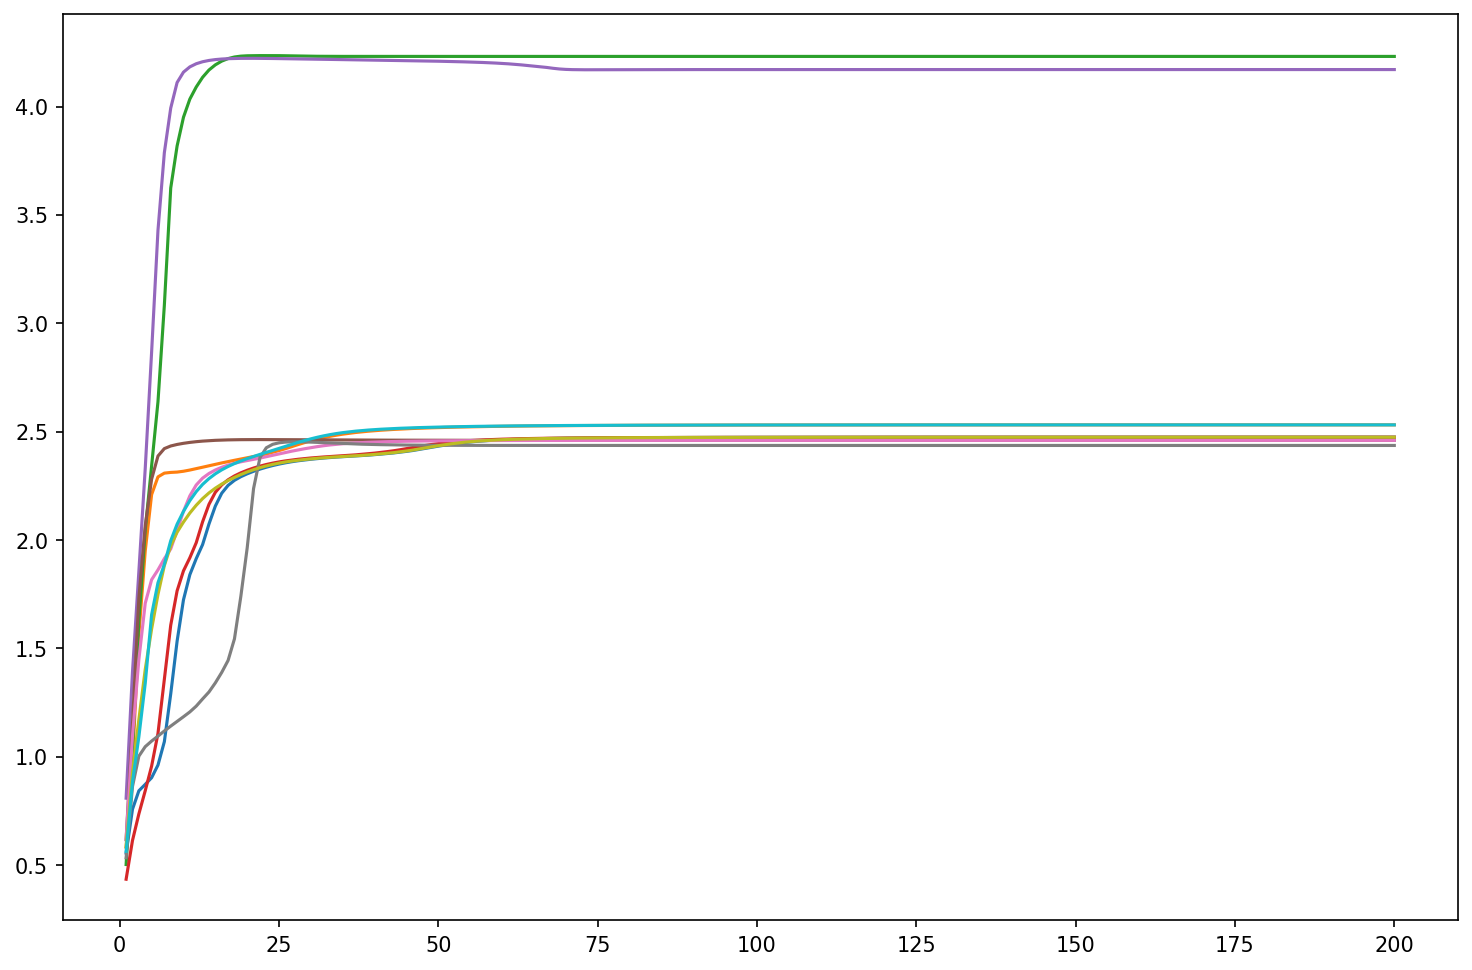

In [32]:
llh=[]
ll=(llh,)*10
covs=[]
mus=[]
pis=[]
yaxis=range(1,201)
for i in range(10):
    ri,llh,cov,mu,pi=expectation(X,3,200)
    ll[i].append(llh)
    plt.plot(yaxis,llh)